In [45]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import keras
from keras.datasets import cifar10
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils.sequence  import steps_per_epoch 
from keras.optimizers import adamax
import matplotlib.pyplot as plt
import os
import keras.backend as K
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, Callback, ModelCheckpoint
import numpy as np
import pickle
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Model
from keras.utils import multi_gpu_model
from tensorflow.python.client import device_lib
import random
import warnings
from keras.utils import Sequence
import tensorflow as tf

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [86]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
batch_size = 256
num_classes = 10
epochs = 5


In [0]:
model = densenet.DenseNet121(
    weights='/content/drive/My Drive/Weights/DenseNet-BC-121-32.h5',
    include_top=True,
    input_shape=(32,32,3)
)


In [51]:
model.layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_29 (ZeroPaddi (None, 38, 38, 3)         0         
_________________________________________________________________
conv1/conv (Conv2D)          (None, 16, 16, 64)        9408      
_________________________________________________________________
conv1/bn (BatchNormalization (None, 16, 16, 64)        256       
_________________________________________________________________
conv1/relu (Activation)      (None, 16, 16, 64)        0         
_________________________________________________________________
zero_padding2d_30 (ZeroPaddi (None, 18, 18, 64)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2_block1_0_bn (BatchNorm (None, 8, 8, 64)          256       
__________

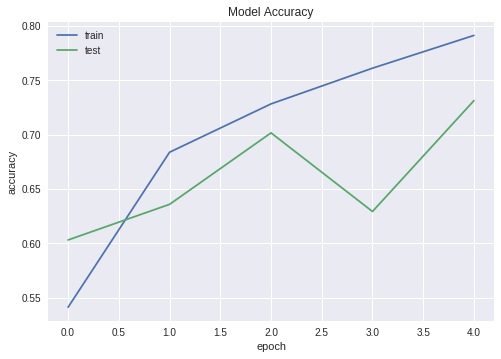

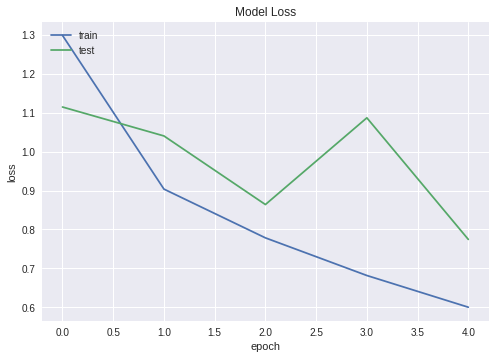

In [90]:
trans_model = Sequential(model.layers[:12])


trans_model.add(Flatten())
trans_model.add(Dense(1024))
trans_model.add(Activation('relu'))
trans_model.add(Dropout(0.25))

trans_model.add(Dense(512))
trans_model.add(Activation('relu'))
trans_model.add(Dropout(0.35))

trans_model.add(Dense(num_classes))
trans_model.add(Activation('softmax'))

trans_model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


# trans_model.add(Dense(128))
# trans_model.add(Activation('relu'))
# #trans_model.add(Dense(10))
# #trans_model.add(Activation('softmax'))
# trans_model.add(Dense(num_classes, activation='softmax'))
# trans_model.summary()
# trans_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trans_model.summary()
#hist2 = trans_model.fit(x_train, y_train, nb_epoch=10, shuffle=True, batch_size=100, validation_data=(x_test, y_test), verbose=2)

train_history=trans_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True,
          verbose=1,
          validation_data=(x_test, y_test),
          )



# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
def load_image(img_path, show=True):
   img = image.load_img(img_path, target_size=(32, 32))
   img_tensor = image.img_to_array(img)                    # (height, width, channels)
   img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
   img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
   if show:
       plt.imshow(img_tensor[0])
       plt.axis('off')
       plt.show()
   return img_tensor

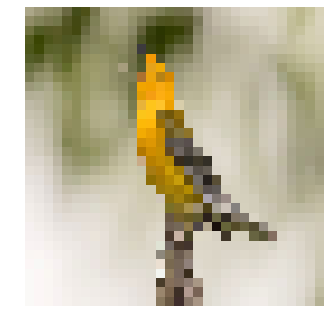

In [92]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
# load model
#model = load_model("/content/drive/My Drive/Tar_File/saved_models/keras_MaxNet_trained_model.h5")

# load a single image
new_image = load_image("/content/drive/My Drive/MaxNet Files/prow-featured.jpg")

# check prediction
pred = trans_model.predict(new_image)

In [93]:
pred

array([[1.03953965e-01, 1.15328515e-03, 7.83927321e-01, 5.04986756e-02,
        2.11512968e-02, 1.68351806e-03, 1.47230998e-02, 2.82732514e-03,
        1.94367226e-02, 6.44753978e-04]], dtype=float32)

3rd class of the Cifar 10 dataset is a Bird. 
